# Insurance Claim Data Preprocessing with Pyspark

In [ ]:
pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# 1. Create a SparkSession
spark = SparkSession.builder\
    .appName("ReadInsuranceClaims") \
    .getOrCreate()

# 2. Define the path to your CSV file
file_path = "insurance_claims.csv"

# 3. Read the CSV data with options
df = spark.read \
    .csv(file_path, header=True, inferSchema=True)

# 4. (Optional) Print the schema of the DataFrame
df.printSchema()

root
 |-- months_as_customer: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- policy_number: integer (nullable = true)
 |-- policy_bind_date: date (nullable = true)
 |-- policy_state: string (nullable = true)
 |-- policy_csl: string (nullable = true)
 |-- policy_deductable: integer (nullable = true)
 |-- policy_annual_premium: double (nullable = true)
 |-- umbrella_limit: integer (nullable = true)
 |-- insured_zip: integer (nullable = true)
 |-- insured_sex: string (nullable = true)
 |-- insured_education_level: string (nullable = true)
 |-- insured_occupation: string (nullable = true)
 |-- insured_hobbies: string (nullable = true)
 |-- insured_relationship: string (nullable = true)
 |-- capital-gains: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- incident_date: date (nullable = true)
 |-- incident_type: string (nullable = true)
 |-- collision_type: string (nullable = true)
 |-- incident_severity: string (nullable = true)
 |-- authoritie

In [ ]:
# 5. (Optional) Preview the first few rows of data
df.show(10)

+------------------+---+-------------+----------------+------------+----------+-----------------+---------------------+--------------+-----------+-----------+-----------------------+------------------+---------------+--------------------+-------------+------------+-------------+--------------------+---------------+-----------------+---------------------+--------------+-------------+------------------+------------------------+---------------------------+---------------+---------------+---------+-----------------------+------------------+------------+--------------+-------------+---------+----------+---------+--------------+----+
|months_as_customer|age|policy_number|policy_bind_date|policy_state|policy_csl|policy_deductable|policy_annual_premium|umbrella_limit|insured_zip|insured_sex|insured_education_level|insured_occupation|insured_hobbies|insured_relationship|capital-gains|capital-loss|incident_date|       incident_type| collision_type|incident_severity|authorities_contacted|incident

In [ ]:
# Remove the column named "_c39"
df = df.drop('_c39')
df.show(10)

+------------------+---+-------------+----------------+------------+----------+-----------------+---------------------+--------------+-----------+-----------+-----------------------+------------------+---------------+--------------------+-------------+------------+-------------+--------------------+---------------+-----------------+---------------------+--------------+-------------+------------------+------------------------+---------------------------+---------------+---------------+---------+-----------------------+------------------+------------+--------------+-------------+---------+----------+---------+--------------+
|months_as_customer|age|policy_number|policy_bind_date|policy_state|policy_csl|policy_deductable|policy_annual_premium|umbrella_limit|insured_zip|insured_sex|insured_education_level|insured_occupation|insured_hobbies|insured_relationship|capital-gains|capital-loss|incident_date|       incident_type| collision_type|incident_severity|authorities_contacted|incident_stat

# Check column datatype

In [ ]:
column_info = df.dtypes

# Print data types for all columns
print("Data types for all columns:")
for col_name, data_type in column_info:
    print(f"{col_name}: {data_type}")

Data types for all columns:
months_as_customer: int
age: int
policy_number: int
policy_bind_date: date
policy_state: string
policy_csl: string
policy_deductable: int
policy_annual_premium: double
umbrella_limit: int
insured_zip: int
insured_sex: string
insured_education_level: string
insured_occupation: string
insured_hobbies: string
insured_relationship: string
capital-gains: int
capital-loss: int
incident_date: date
incident_type: string
collision_type: string
incident_severity: string
authorities_contacted: string
incident_state: string
incident_city: string
incident_location: string
incident_hour_of_the_day: int
number_of_vehicles_involved: int
property_damage: string
bodily_injuries: int
witnesses: int
police_report_available: string
total_claim_amount: int
injury_claim: int
property_claim: int
vehicle_claim: int
auto_make: string
auto_model: string
auto_year: int
fraud_reported: string


# Check the amount of Datatypes for String datatypes

In [ ]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, countDistinct

object_columns = [col_name for col_name, data_type in df.dtypes if data_type == 'string']

unique_counts = {}
for col_name in object_columns:
    unique_counts[col_name] = df.select(col_name).distinct().count()

print("Unique value counts for object datatype columns:")
for col_name, count in unique_counts.items():
    print(f"{col_name}: {count}")


Unique value counts for object datatype columns:
policy_state: 3
policy_csl: 3
insured_sex: 2
insured_education_level: 7
insured_occupation: 14
insured_hobbies: 20
insured_relationship: 6
incident_type: 4
collision_type: 4
incident_severity: 4
authorities_contacted: 5
incident_state: 7
incident_city: 7
incident_location: 1000
property_damage: 3
police_report_available: 3
auto_make: 14
auto_model: 39
fraud_reported: 2


In [ ]:
# Remove the column named "incident_location"
df = df.drop('incident_location', 'incident_date')
df.show(10)

+------------------+---+-------------+----------------+------------+----------+-----------------+---------------------+--------------+-----------+-----------+-----------------------+------------------+---------------+--------------------+-------------+------------+--------------------+---------------+-----------------+---------------------+--------------+-------------+------------------------+---------------------------+---------------+---------------+---------+-----------------------+------------------+------------+--------------+-------------+---------+----------+---------+--------------+
|months_as_customer|age|policy_number|policy_bind_date|policy_state|policy_csl|policy_deductable|policy_annual_premium|umbrella_limit|insured_zip|insured_sex|insured_education_level|insured_occupation|insured_hobbies|insured_relationship|capital-gains|capital-loss|       incident_type| collision_type|incident_severity|authorities_contacted|incident_state|incident_city|incident_hour_of_the_day|number

# Cluster the unique values from the 'auto_model' column into 5 to 7 categories

In [ ]:
# Get unique values from the 'auto_model' column
unique_auto_models = df.select('auto_model').distinct()

# Adjust configuration to display more rows
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark.conf.set("spark.sql.repl.eagerEval.maxNumRows", 1000)  # Set the desired maximum number of rows to display

# Show all unique values
unique_auto_models.show(unique_auto_models.count(), truncate=False)

+--------------+
|auto_model    |
+--------------+
|MDX           |
|Camry         |
|Wrangler      |
|3 Series      |
|CRV           |
|Fusion        |
|92x           |
|Impreza       |
|Neon          |
|Pathfinder    |
|Malibu        |
|X6            |
|ML350         |
|RAM           |
|Legacy        |
|Accord        |
|Highlander    |
|Ultima        |
|C300          |
|95            |
|93            |
|RSX           |
|TL            |
|E400          |
|Corolla       |
|Escape        |
|M5            |
|Civic         |
|Maxima        |
|Silverado     |
|Forrestor     |
|A5            |
|Jetta         |
|Grand Cherokee|
|F150          |
|Tahoe         |
|X5            |
|A3            |
|Passat        |
+--------------+



In [ ]:
df.show(10)

+------------------+---+-------------+----------------+------------+----------+-----------------+---------------------+--------------+-----------+-----------+-----------------------+------------------+---------------+--------------------+-------------+------------+--------------------+---------------+-----------------+---------------------+--------------+-------------+------------------------+---------------------------+---------------+---------------+---------+-----------------------+------------------+------------+--------------+-------------+---------+----------+---------+--------------+
|months_as_customer|age|policy_number|policy_bind_date|policy_state|policy_csl|policy_deductable|policy_annual_premium|umbrella_limit|insured_zip|insured_sex|insured_education_level|insured_occupation|insured_hobbies|insured_relationship|capital-gains|capital-loss|       incident_type| collision_type|incident_severity|authorities_contacted|incident_state|incident_city|incident_hour_of_the_day|number

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

# Define the conditions and corresponding values
conditions = [
    (df['auto_model'].isin(['92x', 'E400', 'A5', '3 Series', 'C300', 'M5', 'X5', 'X6', 'Fusion', 'Jetta', 'ML350']), 'Luxury/Sports'),
    (df['auto_model'].isin(['RAM', 'Tahoe', 'Highlander', 'Escape', 'Silverado', 'Wrangler', 'Malibu', 'Ultima', 'Grand Cherokee']), 'SUV/Truck'),
    (df['auto_model'].isin(['95', 'Neon', 'Legacy', 'Impreza', 'Forrestor']), 'Sedan/Wagon'),
    (df['auto_model'].isin(['Pathfinder', 'MDX', 'Maxima', 'TL', 'CRV', 'Accord', 'Passat']), 'Midsize SUV/Sedan'),
    (df['auto_model'].isin(['Camry', 'F150', 'A3', 'Corolla', 'Civic']), 'Compact Car/Truck')
]

# Apply the conditions and set default value as 'Other'
df = df.withColumn('auto_model',
                   when(conditions[0][0], conditions[0][1])
                   .when(conditions[1][0], conditions[1][1])
                   .when(conditions[2][0], conditions[2][1])
                   .when(conditions[3][0], conditions[3][1])
                   .when(conditions[4][0], conditions[4][1])
                   .otherwise('Other'))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_theme(color_codes=True)

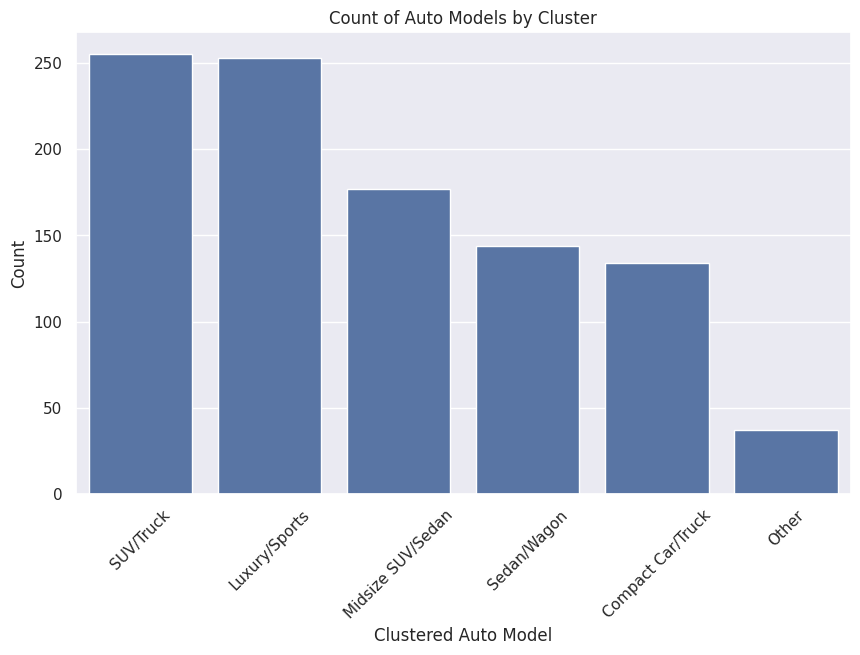

In [ ]:
# Group by 'auto_model' and count occurrences
cluster_counts = df.groupby('auto_model').count().orderBy('count', ascending=False)

# Convert the result to Pandas DataFrame
cluster_counts_pd = cluster_counts.toPandas()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_counts_pd, x='auto_model', y='count', order=cluster_counts_pd['auto_model'])
plt.title('Count of Auto Models by Cluster')
plt.xlabel('Clustered Auto Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from pyspark.sql.functions import when

# Iterate over each column
for col in df.columns:
    # Get the datatype of the column
    col_type = df.schema[col].dataType

    # Replace '?' with 'unknown' in each column and maintain datatype
    df = df.withColumn(col, when(df[col] == '?', None).otherwise(df[col]))
    df = df.withColumn(col, when(df[col].isNull(), 'unknown').otherwise(df[col]))

    # Convert the column datatype back to its original datatype
    df = df.withColumn(col, df[col].cast(col_type))

# Data Preprocessing Part 2

In [ ]:
column_info = df.dtypes

# Print data types for all columns
print("Data types for all columns:")
for col_name, data_type in column_info:
    print(f"{col_name}: {data_type}")

Data types for all columns:
months_as_customer: int
age: int
policy_number: int
policy_bind_date: date
policy_state: string
policy_csl: string
policy_deductable: int
policy_annual_premium: double
umbrella_limit: int
insured_zip: int
insured_sex: string
insured_education_level: string
insured_occupation: string
insured_hobbies: string
insured_relationship: string
capital-gains: int
capital-loss: int
incident_type: string
collision_type: string
incident_severity: string
authorities_contacted: string
incident_state: string
incident_city: string
incident_hour_of_the_day: int
number_of_vehicles_involved: int
property_damage: string
bodily_injuries: int
witnesses: int
police_report_available: string
total_claim_amount: int
injury_claim: int
property_claim: int
vehicle_claim: int
auto_make: string
auto_model: string
auto_year: int
fraud_reported: string


In [ ]:
from pyspark.sql.functions import col, when, count

# Check for null or empty values in each column
df_null_counts = df.select([
    count(when(col(c).isNull() | (col(c) == ''), c)).alias(c)
    for c in df.columns
])

df_null_counts.show()

+------------------+---+-------------+----------------+------------+----------+-----------------+---------------------+--------------+-----------+-----------+-----------------------+------------------+---------------+--------------------+-------------+------------+-------------+--------------+-----------------+---------------------+--------------+-------------+------------------------+---------------------------+---------------+---------------+---------+-----------------------+------------------+------------+--------------+-------------+---------+----------+---------+--------------+
|months_as_customer|age|policy_number|policy_bind_date|policy_state|policy_csl|policy_deductable|policy_annual_premium|umbrella_limit|insured_zip|insured_sex|insured_education_level|insured_occupation|insured_hobbies|insured_relationship|capital-gains|capital-loss|incident_type|collision_type|incident_severity|authorities_contacted|incident_state|incident_city|incident_hour_of_the_day|number_of_vehicles_inv

# Label Encoding for Object Datatypes

In [ ]:
from pyspark.sql.types import StringType

# Get columns with datatype 'string'
object_columns = [col_name for col_name, data_type in df.dtypes if data_type == 'string']


# Loop over each object column
for col in object_columns:
    # Collect unique values
    unique_values = df.select(col).distinct().rdd.map(lambda row: row[0]).collect()

    # Print the column name and the unique values
    print(f"{col}: {unique_values}")

policy_state: ['IL', 'IN', 'OH']
policy_csl: ['500/1000', '250/500', '100/300']
insured_sex: ['MALE', 'FEMALE']
insured_education_level: ['Masters', 'High School', 'Associate', 'JD', 'MD', 'PhD', 'College']
insured_occupation: ['tech-support', 'craft-repair', 'machine-op-inspct', 'other-service', 'exec-managerial', 'armed-forces', 'prof-specialty', 'sales', 'priv-house-serv', 'protective-serv', 'farming-fishing', 'handlers-cleaners', 'transport-moving', 'adm-clerical']
insured_hobbies: ['base-jumping', 'reading', 'sleeping', 'camping', 'exercise', 'hiking', 'kayaking', 'bungie-jumping', 'cross-fit', 'basketball', 'polo', 'golf', 'skydiving', 'chess', 'dancing', 'movies', 'yachting', 'video-games', 'paintball', 'board-games']
insured_relationship: ['unmarried', 'wife', 'not-in-family', 'husband', 'other-relative', 'own-child']
incident_type: ['Vehicle Theft', 'Parked Car', 'Multi-vehicle Collision', 'Single Vehicle Collision']
collision_type: ['unknown', 'Rear Collision', 'Side Collisio

In [ ]:
from pyspark.sql.types import StringType
from pyspark.ml.feature import StringIndexer

# Loop over each column in the DataFrame
for col in df.columns:
    # Check if the column data type is string
    if df.schema[col].dataType == StringType():
        # Initialize a StringIndexer object
        string_indexer = StringIndexer(inputCol=col, outputCol=f"{col}_index")

        # Fit the indexer to the data
        string_indexer_model = string_indexer.fit(df)

        # Transform the column using the indexer
        df = string_indexer_model.transform(df)

        # Replace the original column with the indexed column
        df = df.drop(col).withColumnRenamed(f"{col}_index", col)

# Show the DataFrame to verify the changes
df.show()



+------------------+---+-------------+----------------+-----------------+---------------------+--------------+-----------+-------------+------------+------------------------+---------------------------+---------------+---------+------------------+------------+--------------+-------------+---------+------------+----------+-----------+-----------------------+------------------+---------------+--------------------+-------------+--------------+-----------------+---------------------+--------------+-------------+---------------+-----------------------+---------+----------+--------------+
|months_as_customer|age|policy_number|policy_bind_date|policy_deductable|policy_annual_premium|umbrella_limit|insured_zip|capital-gains|capital-loss|incident_hour_of_the_day|number_of_vehicles_involved|bodily_injuries|witnesses|total_claim_amount|injury_claim|property_claim|vehicle_claim|auto_year|policy_state|policy_csl|insured_sex|insured_education_level|insured_occupation|insured_hobbies|insured_relation

# Remove column that have high correlation

In [ ]:
from pyspark.sql.functions import col, StringType

# Define the correlation threshold
correlation_threshold = 0.8

# Set to store checked column pairs
checked_pairs = set()

# Filter out columns with DateType
numeric_columns = [col_name for col_name, dtype in df.dtypes if dtype != 'date']

# Iterate over each pair of numeric columns in the DataFrame
for col1 in numeric_columns:
    for col2 in numeric_columns:
        # Exclude the same column and previously checked combinations
        if col1 != col2 and (col1, col2) not in checked_pairs and (col2, col1) not in checked_pairs:
            # Calculate the correlation between the two columns
            correlation = df.stat.corr(col1, col2)

            # Check if the correlation is above the threshold
            if abs(correlation) > correlation_threshold:
                print(f"Columns '{col1}' and '{col2}' are highly correlated with correlation {correlation}")

                # Add the pair to the checked_pairs to avoid duplicate checks
                checked_pairs.add((col1, col2))

Columns 'months_as_customer' and 'age' are highly correlated with correlation 0.9220983225789804
Columns 'total_claim_amount' and 'injury_claim' are highly correlated with correlation 0.8050253630561807
Columns 'total_claim_amount' and 'property_claim' are highly correlated with correlation 0.810686495122973
Columns 'total_claim_amount' and 'vehicle_claim' are highly correlated with correlation 0.9827731790805576


In [ ]:
df = df.drop('months_as_customer', 'injury_claim', 'property_claim', 'vehicle_claim')
df.show(10)

+---+-------------+----------------+-----------------+---------------------+--------------+-----------+-------------+------------+------------------------+---------------------------+---------------+---------+------------------+---------+------------+----------+-----------+-----------------------+------------------+---------------+--------------------+-------------+--------------+-----------------+---------------------+--------------+-------------+---------------+-----------------------+---------+----------+--------------+
|age|policy_number|policy_bind_date|policy_deductable|policy_annual_premium|umbrella_limit|insured_zip|capital-gains|capital-loss|incident_hour_of_the_day|number_of_vehicles_involved|bodily_injuries|witnesses|total_claim_amount|auto_year|policy_state|policy_csl|insured_sex|insured_education_level|insured_occupation|insured_hobbies|insured_relationship|incident_type|collision_type|incident_severity|authorities_contacted|incident_state|incident_city|property_damage|pol

In [ ]:
df = df.drop('policy_bind_date')

# Min Max Scaler for all of the Column

In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

# Get all column names from the DataFrame
columns_to_scale = df.columns

# Define VectorAssembler for each column
assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]

# Define MinMaxScaler for each assembled column
scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]

# Create a Pipeline with all assemblers and scalers
pipeline = Pipeline(stages=assemblers + scalers)

# Fit the Pipeline on the DataFrame
scalerModel = pipeline.fit(df)

# Transform the DataFrame
scaledData = scalerModel.transform(df)

In [ ]:
scaledData.show()

+---+-------------+-----------------+---------------------+--------------+-----------+-------------+------------+------------------------+---------------------------+---------------+---------+------------------+---------+------------+----------+-----------+-----------------------+------------------+---------------+--------------------+-------------+--------------+-----------------+---------------------+--------------+-------------+---------------+-----------------------+---------+----------+--------------+----------------+-------+-----------------+---------------------+-------------------------+------------------+---------------+-----------------+----------------+----------------------------+-------------------------------+-------------------+-------------+----------------------+-------------+----------------+--------------+---------------+---------------------------+----------------------+-------------------+------------------------+-----------------+------------------+---------------

# Change Scaled data datatype from vector to be double

In [ ]:
from pyspark.ml.feature import ElementwiseProduct
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# Define a UDF to extract the first element of the vector
extract_first_element = udf(lambda v: float(v[0]), DoubleType())

# Apply the UDF to each column with suffix '_scaled' to extract the first element (the scaled value)
for col in columns_to_scale:
    scaled_col_name = col + "_scaled"
    scaledData = scaledData.withColumn(scaled_col_name, extract_first_element(scaledData[scaled_col_name]))

# Drop the intermediate vector columns
for col in columns_to_scale:
    scaledData = scaledData.drop(col + "_vec")

# Show the transformed DataFrame
scaledData.show()

+---+-------------+-----------------+---------------------+--------------+-----------+-------------+------------+------------------------+---------------------------+---------------+---------+------------------+---------+------------+----------+-----------+-----------------------+------------------+---------------+--------------------+-------------+--------------+-----------------+---------------------+--------------+-------------+---------------+-----------------------+---------+----------+--------------+----------------+-------------------+--------------------+------------------------+----------------------------+---------------------+--------------------+--------------------+-------------------+-------------------------------+----------------------------------+----------------------+------------------+-------------------------+-------------------+-------------------+-----------------+------------------+------------------------------+-------------------------+----------------------+-

# Make a new dataframe only column with _scaled name

In [ ]:
from pyspark.sql.functions import col

# Get the names of columns with the suffix '_scaled'
scaled_columns = [col for col in scaledData.columns if col.endswith("_scaled")]

# Select only the columns with the suffix '_scaled' from the DataFrame
scaled_df = scaledData.select(*scaled_columns)

# Show the new DataFrame
scaled_df.show()

+-------------------+--------------------+------------------------+----------------------------+---------------------+--------------------+--------------------+-------------------+-------------------------------+----------------------------------+----------------------+------------------+-------------------------+-------------------+-------------------+-----------------+------------------+------------------------------+-------------------------+----------------------+---------------------------+--------------------+---------------------+------------------------+----------------------------+---------------------+--------------------+----------------------+------------------------------+-------------------+------------------+---------------------+-----------------------+
|         age_scaled|policy_number_scaled|policy_deductable_scaled|policy_annual_premium_scaled|umbrella_limit_scaled|  insured_zip_scaled|capital-gains_scaled|capital-loss_scaled|incident_hour_of_the_day_scaled|number_o